In [1]:
import tensorflow as tf
from tensorflow import keras
print(f'Tensorflow: {tf.__version__}\nKeras: {keras.__version__}')

Tensorflow: 2.12.0
Keras: 2.12.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_nums = len(class_names)
print(class_nums)

10


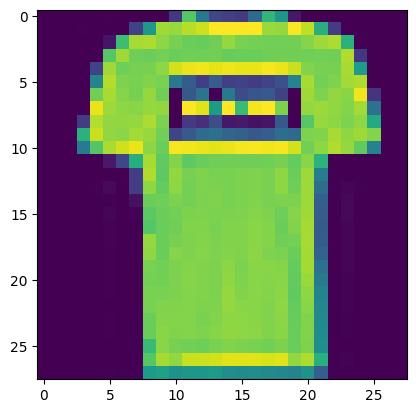

In [8]:
plt.imshow(X_train[1])

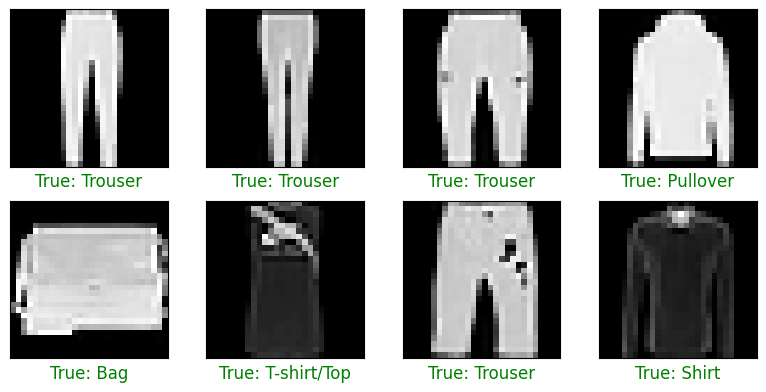

In [10]:
from typing import Optional
def plot_data(x_data:np.ndarray, y_data: np.ndarray, y_prob: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))
    
    len_x = x_data.shape[0]
    for idx in range(nrows*ncols):
        ax = axes[idx // ncols, idx % ncols]
        
        img_idx = random.randint(0, len_x)
        
        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        color = 'green'
        
        true_label_str = f"True: {class_names[y_data[img_idx]]}"
        
        if y_prob is not None:
            predicted_idx = np.argmax(y_prob[img_idx])
            pridicted_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f"\nPredicted: {pridicted_label}"
            
        img_title = true_label_str if y_prob is None else true_label_str + predicted_label_str            
        ax.set_xlabel(img_title, color=color, fontsize=12)
    
    plt.tight_layout()
    plt.show()
        
plot_data(X_train, y_train)

In [11]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [12]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [14]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [16]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

## Network (ANN) Architecture

In [17]:
input_shape = (28,28,1)
from keras.api._v2.keras import activations
model = keras.models.Sequential([
    layers.Flatten(input_shape = input_shape), # (28,28,1) -> (784)
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(class_nums, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics='accuracy') 
## loss = -log(Max Probability)

In [19]:
epochs = 10
batch_size = 256
history = model.fit(X_train, y_train_label,
          epochs = epochs,
          batch_size = batch_size,
          validation_split = 0.1
          )

Epoch 1/10
211/211 [==============================] - 4s 9ms/step - loss: 0.6453 - accuracy: 0.7688 - val_loss: 0.4588 - val_accuracy: 0.8358
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 0.4174 - accuracy: 0.8452 - val_loss: 0.4481 - val_accuracy: 0.8345
Epoch 3/10
211/211 [==============================] - 2s 8ms/step - loss: 0.3655 - accuracy: 0.8645 - val_loss: 0.3730 - val_accuracy: 0.8645
Epoch 4/10
211/211 [==============================] - 2s 8ms/step - loss: 0.3316 - accuracy: 0.8769 - val_loss: 0.3390 - val_accuracy: 0.8755
Epoch 5/10
211/211 [==============================] - 2s 8ms/step - loss: 0.3088 - accuracy: 0.8849 - val_loss: 0.3327 - val_accuracy: 0.8737
Epoch 6/10
211/211 [==============================] - 2s 8ms/step - loss: 0.2878 - accuracy: 0.8916 - val_loss: 0.3291 - val_accuracy: 0.8827
Epoch 7/10
211/211 [==============================] - 2s 8ms/step - loss: 0.2732 - accuracy: 0.8964 - val_loss: 0.3399 - val_accuracy: 0.8798
Epoch 

In [20]:
history_dict = history.history

In [21]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

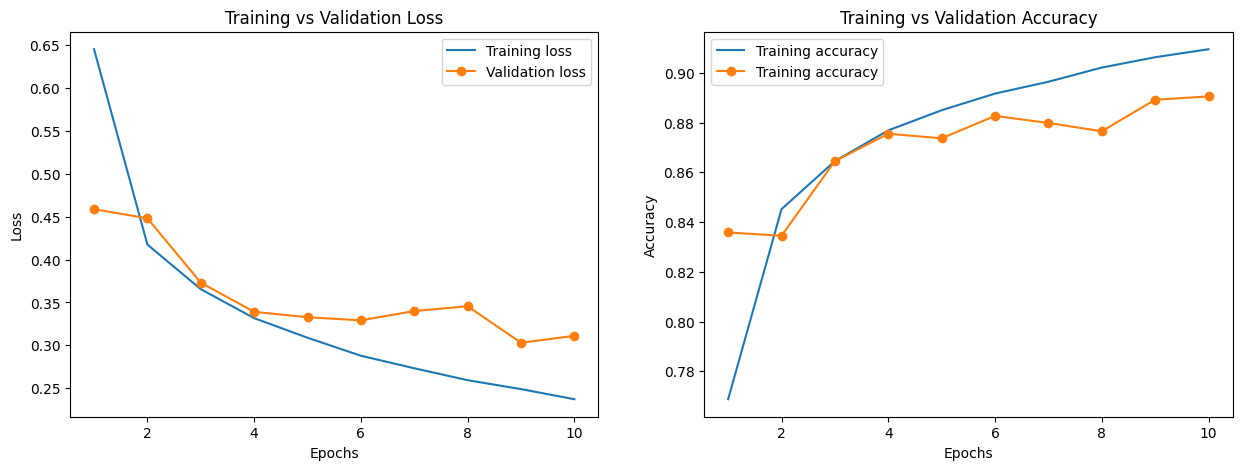

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epochs_runs = [i+1 for i in range(epochs)]

ax1.plot(epochs_runs, train_loss, label='Training loss')
ax1.plot(epochs_runs, val_loss, label='Validation loss', marker = 'o')
ax1.set(title='Training vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epochs_runs, train_acc, label='Training accuracy')
ax2.plot(epochs_runs, val_acc, label='Training accuracy', marker = 'o')
ax2.set(title='Training vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

## Model Evaluation

In [24]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8829


In [25]:
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 0.3398
Test Accuracy: 0.8829


## Prediction

In [26]:
X_samples = X_test[:5]
y_prob = model.predict(X_samples)

1/1 [==============================] - 0s 90ms/step


In [27]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.012, 0.   , 0.011, 0.   ,
        0.977],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.19 , 0.   , 0.009, 0.   , 0.001, 0.   , 0.8  , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [28]:
predictions = np.argmax(y_prob, axis = 1)

In [29]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [30]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


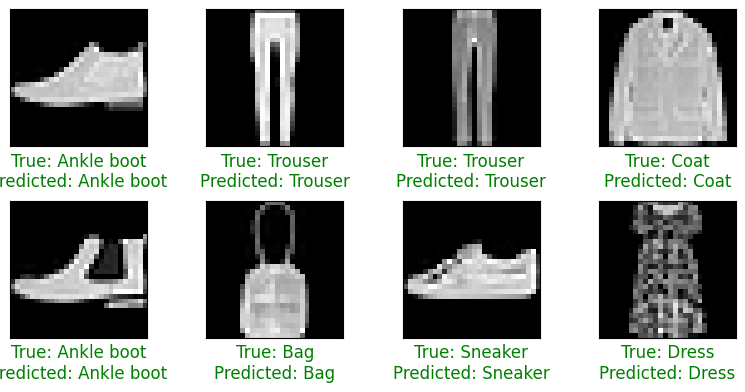

In [34]:
plot_data(X_test, y_test, y_prob)